In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

In [ ]:
def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q;
  return x_proj

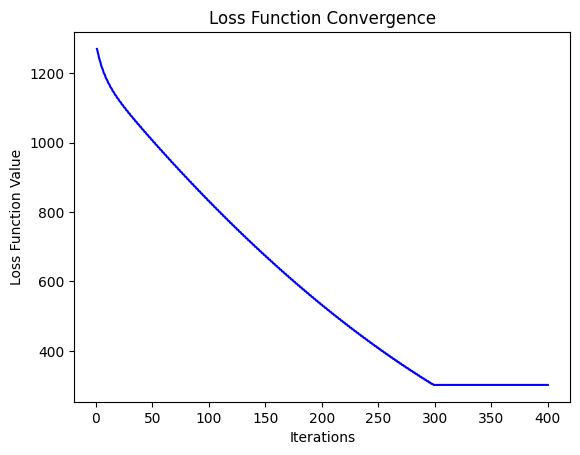

In [ ]:
# we need to control this parameter to generate multiple figures
lam = 1;
#lam = 4;
#lam = 6;
#lam = 3.89;

A = np.array([[  300, 0.5],
              [0.5,   10]])
mu = np.array([[1],
               [2]])

# cvx
w_lasso = cv.Variable((2,1))
obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
objective = cv.Minimize(obj_fn)
constraints = []
prob = cv.Problem(objective, constraints)
result = prob.solve(solver=cv.CVXOPT)
w_lasso = w_lasso.value

#plt.contour(X1, X2, fValue)

x_init = np.array([[ 3],
                   [-1]])
L = np.max(np.linalg.eig(A)[0])

x_history = []
loss_values = []
xt = x_init
for t in range(400):
    x_history.append(xt.T)
    grad = 2 * np.dot(A, xt - mu)
    xth = xt - 1 / L * grad
    xt = st_ops(xth, lam * 1 / L)
    loss = np.dot(np.dot((xt - mu).T, A), (xt - mu)) + lam * np.sum(np.abs(xt))
    loss_values.append(loss)

x_history = np.vstack(x_history)
loss_values = np.array(loss_values).flatten()  # Flatten the 2D array


plt.plot(np.arange(1, len(loss_values) + 1), loss_values, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Loss Function Value')
plt.title('Loss Function Convergence')
plt.show()

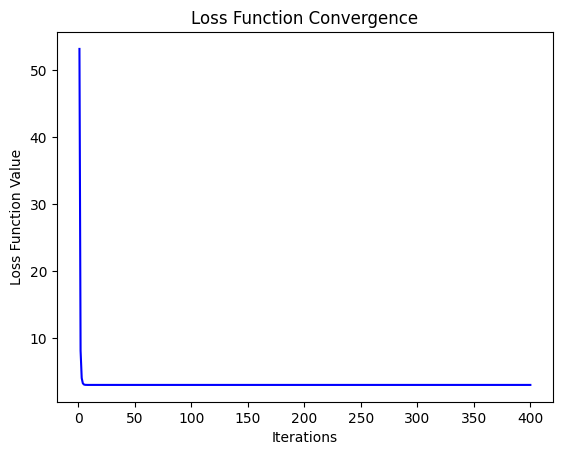

In [ ]:
A = np.array([[300, 0.5],
              [ 0.5,  10]])
mu = np.array([[1],
               [2]])
lam = 1

# cvx
w_lasso = cv.Variable((2,1))
obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
objective = cv.Minimize(obj_fn)
constraints = []
prob = cv.Problem(objective, constraints)
result = prob.solve(solver=cv.CVXOPT)
w_lasso = w_lasso.value

#plt.contour(X1, X2, fValue, 80)

x_init = np.array([[ 3],
                   [-1]])
xt = x_init
L = np.max(np.linalg.eig(A)[0])
eta0 = 500/L;

x_history = []
fvalues = []
g_history = []
delta = 0.02;

loss_values_AG = []

for t in range(400):
  x_history.append(xt.T)
  grad = 2 * np.dot(A, xt-mu)

  g_history.append(grad.flatten().tolist())
  ht = np.sqrt(np.sum(np.array(g_history)**2, axis=0).T) + delta
  ht = ht.reshape(2,1)

  eta_t = eta0
  xth = xt - eta_t * (ht**-1 * grad)
  ht_inv = ht**-1
  xt = np.array([st_ops(xth[0], lam  * eta_t * ht_inv[0]),
                 st_ops(xth[1], lam  * eta_t * ht_inv[1])])

  fv = np.dot(np.dot((xt - mu).T, A), (xt - mu)) + lam * (np.abs(xt[0]) + np.abs(xt[1]))
  fvalues.append(fv)
  loss = np.dot(np.dot((xt - mu).T, A), (xt - mu)) + lam * np.sum(np.abs(xt))
  loss_values_AG.append(loss)

x_history = np.vstack(x_history)
fvalues = np.vstack(fvalues)

loss_values_AG = np.array(loss_values_AG).flatten()  # Flatten the 2D array
plt.plot(np.arange(1, len(loss_values_AG) + 1), loss_values_AG, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Loss Function Value')
plt.title('Loss Function Convergence')
plt.show()

<ipython-input-12-cf6484814290>:5: RuntimeWarning: divide by zero encountered in log10
  loss_difference_AG.append(np.log10(np.abs(loss_values_AG[t]-loss_values_AG[350])))


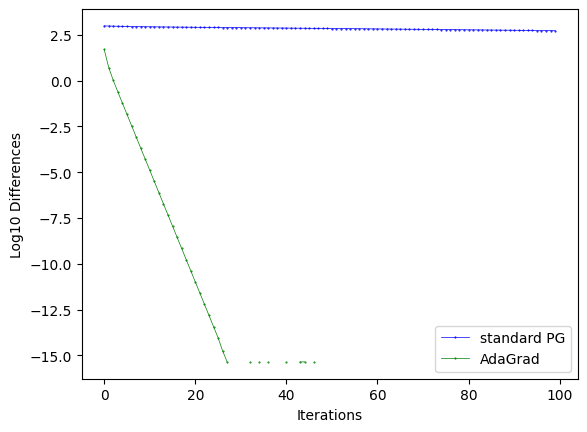

In [ ]:
loss_difference = []
loss_difference_AG = []
for t in range(100):
  loss_difference.append(np.log10(np.abs(loss_values[t]-loss_values[350])))
  loss_difference_AG.append(np.log10(np.abs(loss_values_AG[t]-loss_values_AG[350])))


plt.plot(loss_difference, 'bo-', linewidth=0.5, markersize=0.5, label='standard PG')
plt.plot(loss_difference_AG, 'go-', linewidth=0.5, markersize=0.5, label='AdaGrad')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Log10 Differences')
plt.show()